<a href="https://colab.research.google.com/github/DimaKav/DS-Sprint-01-Dealing-With-Data/blob/master/LSDS_Intro_Assignment_2_Intro_to_Data_Exploration_COMPLETE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Copy the notebook to your google account.

## 2) Import the pandas library and alias it as "pd".

In [0]:
# Testing
import pandas as pd

## 3) Read in the CSV dataset that is found at the following URL:
[DATASET HERE](https://raw.githubusercontent.com/ryanleeallred/datasets/master/messy-data.csv)


In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/messy-data.csv')

## 4) Print out the shape as well as the first 5 rows of the dataframe.

In [0]:
print(data.shape)
data.head(5)

(165, 7)


,alpha,beta,gamma,delta,epsilon,zeta,eta
0,2,48,12,240,3.0,Yes,AZ
1,3,46,18,230,5.0,NaN,VT
2,4,44,24,220,7.0,No,PA
3,5,42,30,210,9.0,Yes,OK
4,6,44,36,220,11.0,Yes,MD


## 5) Print out the datatypes of the dataframe columns (dataset features).

In [0]:
data.dtypes

alpha        int64
beta         int64
gamma        int64
delta        int64
epsilon    float64
zeta        object
eta         object
dtype: object

## 6) Print out the summary statistics of the numeric values of your dataset i.e. min, max, mean, standard deviation, etc.

In [0]:
data.describe()

,alpha,beta,gamma,delta,epsilon
count,165.000000,165.000000,165.000000,165.000000,141.000000
mean,46.169697,17.921212,277.018182,89.606061,164.794326
std,24.371521,17.769180,146.229125,88.845900,96.430843
min,2.000000,-11.000000,12.000000,-55.000000,3.000000
25%,28.000000,7.000000,168.000000,35.000000,83.000000
50%,44.000000,15.000000,264.000000,75.000000,163.000000
75%,65.000000,32.000000,390.000000,160.000000,247.000000
max,85.000000,50.000000,510.000000,250.000000,331.000000


## 6) Clean all NaN values from the dataset.

Feel free to add code cells as needed.#

In [0]:
# See how many are NaN
data.isnull().sum()

alpha       0
beta        0
gamma       0
delta       0
epsilon    24
zeta       19
eta         0
dtype: int64

In [0]:
# Replace NaNs in epsilon with interpolate
data.epsilon = data.epsilon.interpolate()
# Replace NaNs and 'No' in zeta column with 0
data['zeta'] = [1 if x == 'Yes' else 0 for x in data['zeta']]

## 6.1) Describe how you addressed the NaN values and give an explanation justifying your decision.

**epsilon NaNs**

To figure out how to impute epsilon NaNs, I plotted it on a graph to see if its a straight line. Turns out it was so I could use linear interpolation via the interpolate() method.

**zeta NaNs**

The value counts for No and Yes is 74 and 72, so randomly inserting yes's and no's might be a viable strategy, we would first have to check if the values are close to normal distibution. Since the answers are binary and since I don't know why the NaNs are missing, I think it would be better to turn the zeta column into numeric features where 0 represents 'No' and NaN instead.

## 7) Create scatter plots using Matplotlib. Can you find any interesting relationships in the data? Be sure to label your axis and to give your graphs a title.

Screenshot cool graphs that you create and share them with the slack channel. 

Don't forget to import matplotlib before trying to use it.

In [0]:
import matplotlib.pyplot as plt

In [0]:
data.head()

,alpha,beta,gamma,delta,epsilon,zeta,eta
0,2,48,12,240,3.0,1,AZ
1,3,46,18,230,5.0,0,VT
2,4,44,24,220,7.0,0,PA
3,5,42,30,210,9.0,1,OK
4,6,44,36,220,11.0,1,MD


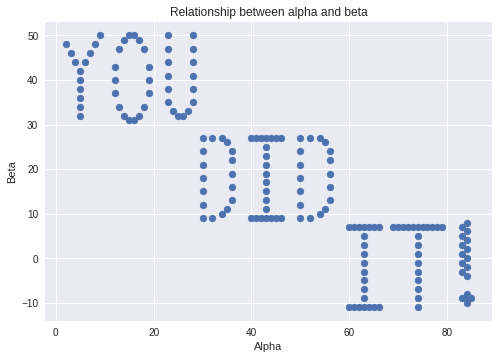

In [0]:
plt.scatter(data.alpha, data.beta)
plt.title('Relationship between alpha and beta')
plt.gca().set(xlabel='Alpha', ylabel='Beta')
plt.show()

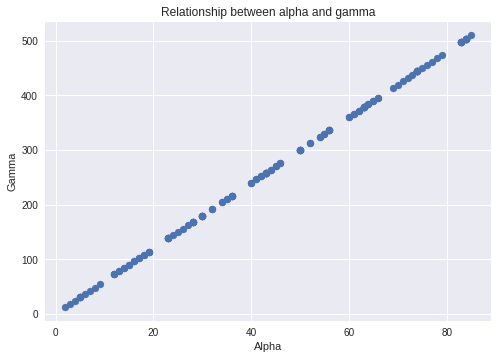

In [0]:
plt.scatter(data.alpha, data.gamma)
plt.title('Relationship between alpha and gamma')
plt.gca().set(xlabel='Alpha', ylabel='Gamma')
plt.show()

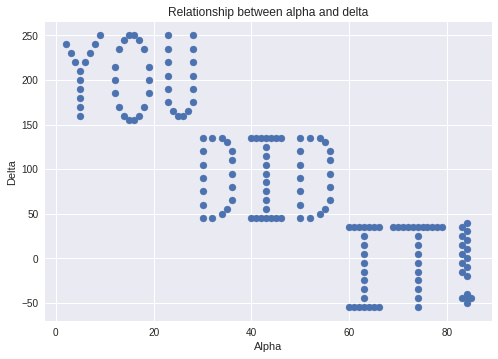

In [0]:
plt.scatter(data.alpha, data.delta)
plt.title('Relationship between alpha and delta')
plt.gca().set(xlabel='Alpha', ylabel='Delta')
plt.show()

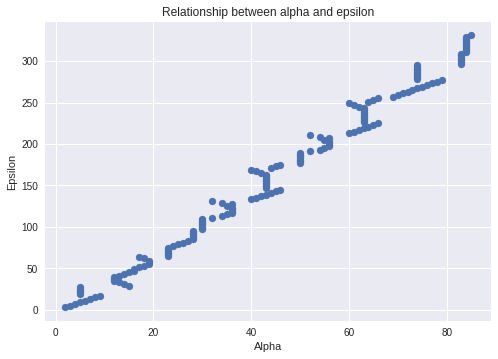

In [0]:
plt.scatter(data.alpha, data.epsilon)
plt.title('Relationship between alpha and epsilon')
plt.gca().set(xlabel='Alpha', ylabel='Epsilon')
plt.show()

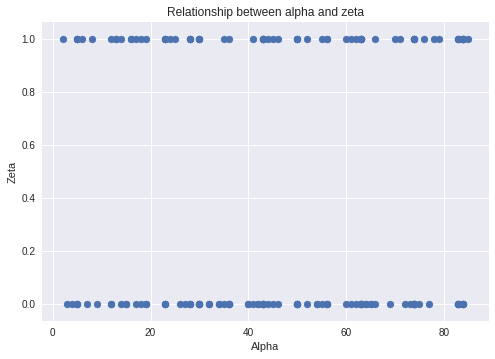

In [0]:
plt.scatter(data.alpha, data.zeta)
plt.title('Relationship between alpha and zeta')
plt.gca().set(xlabel='Alpha', ylabel='Zeta')
plt.show()

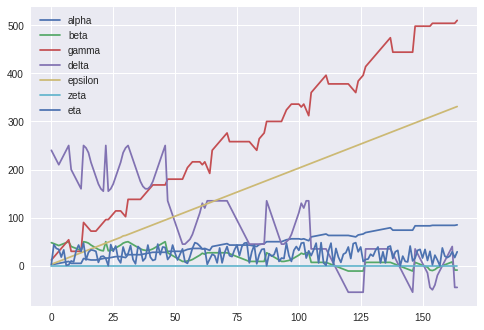

In [0]:
# All graphs
data.plot()

## 8) STRETCH GOAL (Extra Credit)

Machine Learning algorithms don't do well with categorical values that are represented by strings. In order to have this dataset completely cleaned we need to transform the categorical variables that are represented as strings into numeric categorical variables

- **Turn all categorical features (columns) into numeric features**

Hints:

[Scikit-Learn One-Hot-Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

[Pandas Docs - Working with Categorical Data](https://pandas.pydata.org/pandas-docs/stable/categorical.html)

[Guide to Encoding Categorical Variables in Python](http://pbpython.com/categorical-encoding.html)

In [0]:
# Replace NaNs and 'No' in zeta column with 0
data['zeta'] = [1 if x == 'Yes' else 0 for x in data['zeta']]

In [0]:
# Turn the eta column into numerical categorical variables
data.eta = data.eta.astype('category')
data.eta = data.eta.cat.codes

In [0]:
data.head()

,alpha,beta,gamma,delta,epsilon,zeta,eta
0,2,48,12,240,3.0,0,3
1,3,46,18,230,5.0,0,44
2,4,44,24,220,7.0,0,36
3,5,42,30,210,9.0,0,34
4,6,44,36,220,11.0,0,18


In [0]:
data.dtypes

alpha        int64
beta         int64
gamma        int64
delta        int64
epsilon    float64
zeta         int64
eta           int8
dtype: object